In [4]:
from scipy import ndimage
from astropy.io import fits
import scipy.ndimage
%matplotlib inline
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'
pl.rcParams['image.origin'] = 'lower'
pl.rcParams['figure.figsize'] = (10,8)
from astropy.io import fits
import reproject
from astropy import convolution
from astropy.convolution import Gaussian2DKernel
from astropy import units as u
from astropy.table import Table
import pyavm
import regions
from astropy import coordinates
import PIL
#from spectral_cube import SpectralCube, Projection, Slice
from astropy import wcs
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb
import numpy as np
import pylab as pl
from astropy.visualization import simple_norm


In [5]:
import glob
import warnings
import regions
from tqdm.notebook import tqdm

In [7]:
basepath = '/orange/adamginsburg/jwst/cloudc/'

In [31]:
#from destreak import destreak
#%run $basepath/reduction/brick-jwst-2221/reduction/destreak.py


In [3]:
img = fits.getdata(f"{basepath}//images/jw02221-o002_t001_nircam_clear-f405n-merged_realigned-to-vvv.fits", ext=1)
header = fits.getheader(f"{basepath}//images/jw02221-o002_t001_nircam_clear-f405n-merged_realigned-to-vvv.fits", ext=1)
ww = wcs.WCS(header)
img.shape

(2466, 8003)

In [4]:
regs = regions.Regions.read(f'{basepath}/regions_/bright_stars_long2.reg')
if regs is not None:
    for reg in regs:
        preg = reg.to_pixel(ww)
        mask = preg.to_mask()
        slcs,smslcs = mask.get_overlap_slices(img.shape)
        img[slcs][mask.data.astype('bool')[smslcs]] = np.nan
img[img==0] = np.nan

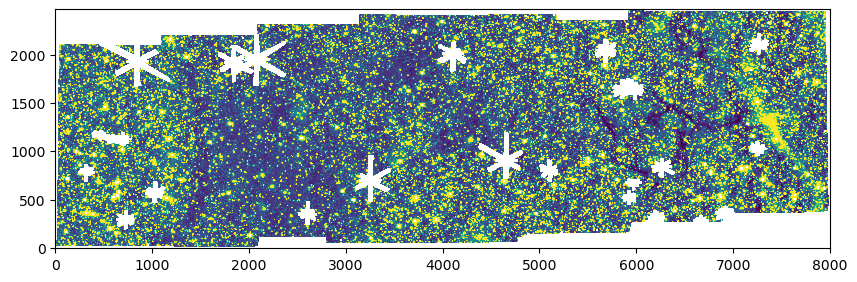

In [5]:
pl.imshow(img, vmin=-1, vmax=25)

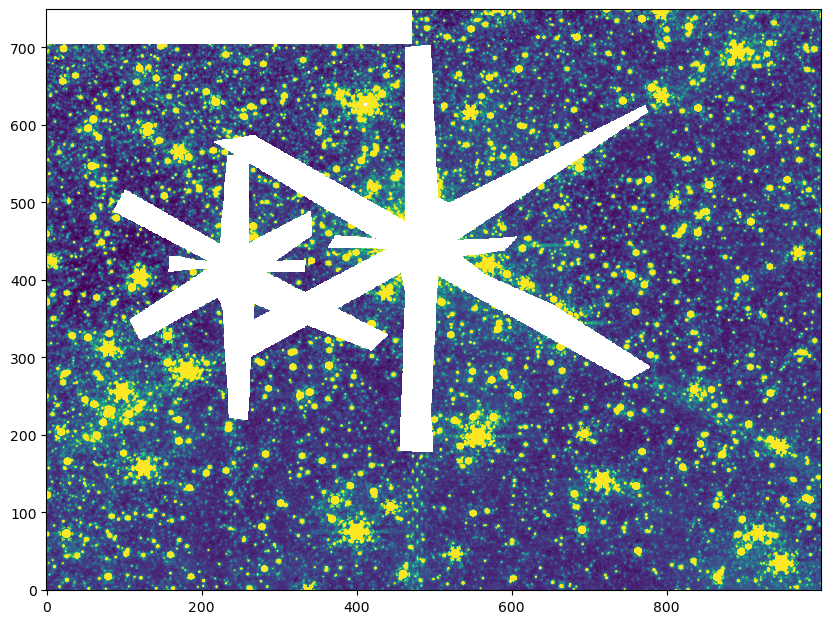

In [6]:
pl.imshow(img[1500:2250, 1600:2600], vmin=-1, vmax=25)

20


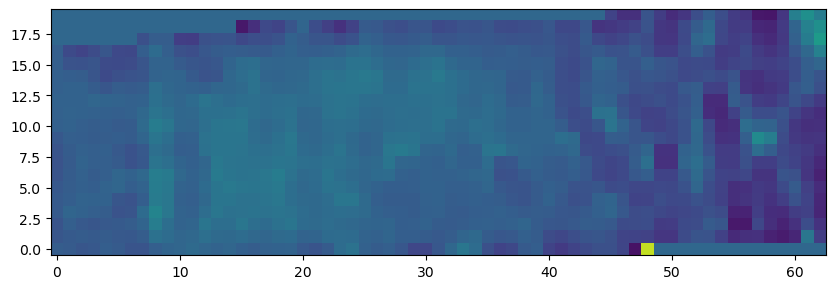

In [7]:
dx = 256
chunks = [[img[(slice(sty, sty+dx), slice(stx, stx+dx))]
          for stx in range(0, img.shape[1], dx//2)]
          for sty in range(0, img.shape[0], dx//2)
         ]
print(len(chunks))

# only include positive values
arr = np.array(
    [[np.nanpercentile(ch, 1) if np.any(ch > 0) else 0
      for ch in row]
     for row in chunks]
)
pl.imshow(arr, vmin=-5, vmax=10)

39


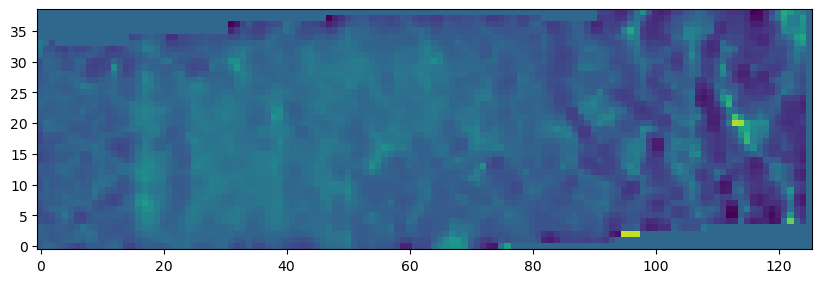

In [8]:
dx = 128
chunks = [[img[(slice(sty, sty+dx), slice(stx, stx+dx))]
          for stx in range(0, img.shape[1], dx//2)]
          for sty in range(0, img.shape[0], dx//2)
         ]
print(len(chunks))

# only include positive values
arr = np.array(
    [[np.nanpercentile(ch, 1) if np.any(ch > 0) else 0
      for ch in row]
     for row in chunks]
)
pl.imshow(arr, vmin=-5, vmax=10)

78


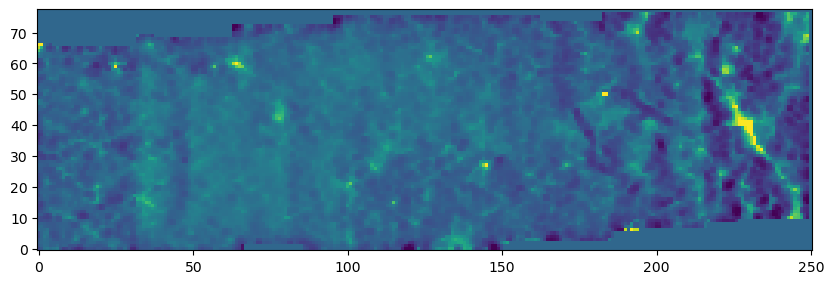

In [9]:
dx = 64
chunks = [[img[(slice(sty, sty+dx), slice(stx, stx+dx))]
          for stx in range(0, img.shape[1], dx//2)]
          for sty in range(0, img.shape[0], dx//2)
         ]
print(len(chunks))

# only include positive values
arr = np.array(
    [[np.nanpercentile(ch, 1) if np.any(ch > 0) else 0
      for ch in row]
     for row in chunks]
)
pl.imshow(arr, vmin=-5, vmax=10)

155


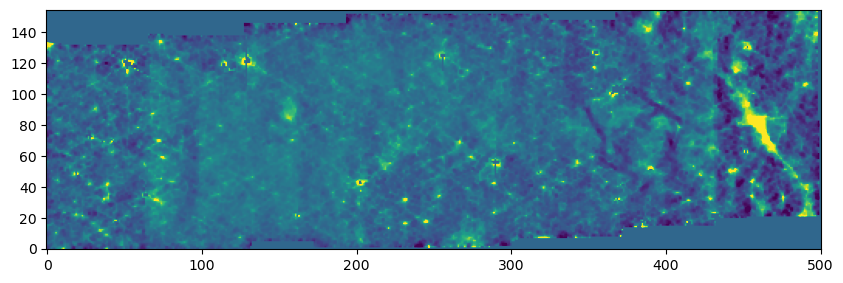

In [10]:
dx = 32#200#256
chunks = [[img[(slice(sty, sty+dx), slice(stx, stx+dx))]
          for stx in range(0, img.shape[1], dx//2)]
          for sty in range(0, img.shape[0], dx//2)
         ]
print(len(chunks))

# only include positive values
arr = np.array(
    [[np.nanpercentile(ch, 1) if np.any(ch > 0) else 0
      for ch in row]
     for row in chunks]
)
pl.imshow(arr, vmin=-5, vmax=10)

In [12]:
# jw02221-o002_t001_nircam_clear-f405n-merged_realigned-to-vvv.fits

'/orange/adamginsburg/jwst/cloudc/'

In [34]:
ls /orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_*_i2d.fits

/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f405n-merged_realigned-to-vvv_i2d.fits


In [44]:
basepath

'/orange/adamginsburg/jwst/cloudc/'

In [10]:
cd /orange/adamginsburg/jwst/cloudc/reduction/brick-jwst-2221/reduction

/blue/adamginsburg/adamginsburg/jwst/cloudc/reduction/brick-jwst-2221/reduction


In [12]:
from destreak import compute_zero_spacing_approximation

In [13]:
for fn in glob.glob(f'{basepath}/images/jw02221-o002_t001_nircam_*nodestreak_i2d.fits'):
    print(fn)
    with warnings.catch_warnings():
        # specifically ignoring that we're using non-integer 
        warnings.simplefilter('ignore')
        dx = 128 if 'f4' in fn else 256
        sl = 'long' if 'f4' in fn else 'short'
        regs = regions.Regions.read(f'{basepath}/regions_/bright_stars_{sl}.reg')
        tp = compute_zero_spacing_approximation(fn, ext=1, dx=dx, regs=regs, percentile=10, progressbar=tqdm)
        #if np.nanpercentile(tp.data, 10) < 0:
        #    print(np.nanpercentile(tp.data, 10))
        #    tp.data -= np.nanpercentile(tp.data, 10)
        #tp.data[tp.data<0] = 0
        tp.writeto(fn.replace("_i2d.fits", f"_i2d_medfilt{dx}.fits"), overwrite=True)
        print(fn)
        print(fn.replace("_i2d.fits", f"_i2d_medfilt{dx}.fits"))

/orange/adamginsburg/jwst/cloudc//images/jw02221-o002_t001_nircam_clear-f466n-merged-nodestreak_i2d.fits


  0%|          | 0/41 [00:00<?, ?it/s]

/orange/adamginsburg/jwst/cloudc//images/jw02221-o002_t001_nircam_clear-f466n-merged-nodestreak_i2d.fits
/orange/adamginsburg/jwst/cloudc//images/jw02221-o002_t001_nircam_clear-f466n-merged-nodestreak_i2d_medfilt128.fits
/orange/adamginsburg/jwst/cloudc//images/jw02221-o002_t001_nircam_clear-f405n-merged-nodestreak_i2d.fits


  0%|          | 0/41 [00:00<?, ?it/s]

/orange/adamginsburg/jwst/cloudc//images/jw02221-o002_t001_nircam_clear-f405n-merged-nodestreak_i2d.fits
/orange/adamginsburg/jwst/cloudc//images/jw02221-o002_t001_nircam_clear-f405n-merged-nodestreak_i2d_medfilt128.fits
/orange/adamginsburg/jwst/cloudc//images/jw02221-o002_t001_nircam_clear-f410m-merged-nodestreak_i2d.fits


  0%|          | 0/41 [00:00<?, ?it/s]

/orange/adamginsburg/jwst/cloudc//images/jw02221-o002_t001_nircam_clear-f410m-merged-nodestreak_i2d.fits
/orange/adamginsburg/jwst/cloudc//images/jw02221-o002_t001_nircam_clear-f410m-merged-nodestreak_i2d_medfilt128.fits


In [41]:
glob.glob('/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_*_i2d.fits')

['/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f405n-merged_realigned-to-vvv_i2d.fits']